In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pylab as plt 
from io import StringIO



1. Построить гистограммы (5 баллов)

In [111]:
# read the data to pd frame, replace NaN with zeros
url_data = "https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv"
data_raw = requests.get(url_data).content.decode("utf-8")
reads_data = pd.read_csv(StringIO(data_raw))
reads_data.replace(np.nan, 0, inplace=True)
reads_data.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,0.0,0.983503,0.000815,0.000000,0.006896
1,280,8045,7995,48,19,9,0.0,16.0,13.0,19.0,0.000000,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,0.0,24.0,4.0,24.0,0.000000,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,0.0,0.012750,0.049096,0.000000,0.000919
4,283,8042,7786,155,115,62,46.0,0.0,93.0,31.0,0.004960,0.010992,0.003186,0.000000


In [129]:
# aggregate 
bases_dist = reads_data.melt(id_vars=["pos"], value_vars=["A", "C", "T", "G"])
bases_dist = bases_dist.groupby(["pos", "variable"]).sum()
bases_dist.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

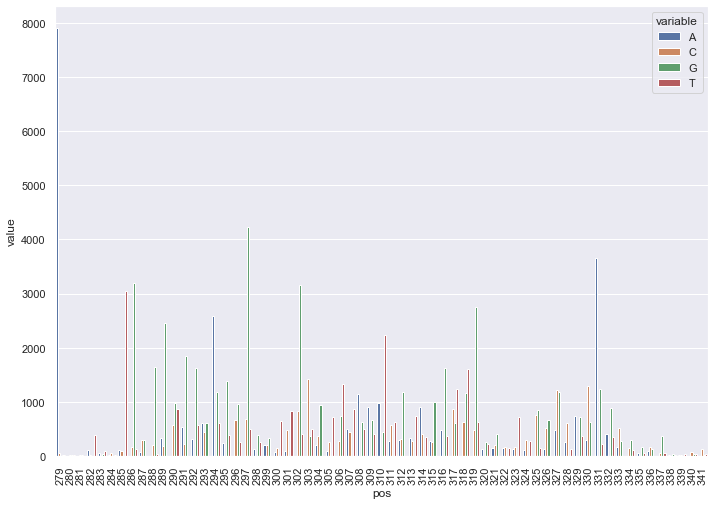

In [127]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="pos", y="value", hue="variable", data=bases_dist)
plt.xticks(rotation=90)

2. Отбор необходимых данных (5 баллов)
Сохраните в файл train_part.csv следующую часть из файла train.csv (из предыдущего задания):
Строки, где matches больше чем среднее
Колонки pos, reads_all, mismatches, deletions, insertions

In [112]:
reads_data.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,0.0,0.983503,0.000815,0.000000,0.006896
1,280,8045,7995,48,19,9,0.0,16.0,13.0,19.0,0.000000,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,0.0,24.0,4.0,24.0,0.000000,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,0.0,0.012750,0.049096,0.000000,0.000919
4,283,8042,7786,155,115,62,46.0,0.0,93.0,31.0,0.004960,0.010992,0.003186,0.000000


In [124]:
train_part = reads_data.loc[reads_data["pos"] > reads_data["pos"].mean(), 
               ["pos", "reads_all", "mismatches", "deletions", "insertions"]]
train_part.to_csv("train_part.csv", index=False)

3. Сделать небольшой EDA (15 баллов)
Нужны корреляции, графики распределений
data: https://www.kaggle.com/georgesaavedra/covid19-dataset?select=owid-covid-data.csv

In [132]:
covid_data = pd.read_csv("owid-covid-data.csv")

In [133]:
covid_data.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


evaluate NAs for data and get columns type

In [141]:
covid_data.isna().sum()

iso_code                                        0
continent                                    9748
location                                        0
date                                            0
total_cases                                  2965
                                            ...  
human_development_index                     29408
excess_mortality_cumulative_absolute       157087
excess_mortality_cumulative                157087
excess_mortality                           157075
excess_mortality_cumulative_per_million    157087
Length: 67, dtype: int64

In [140]:
covid_data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

correlation matrix

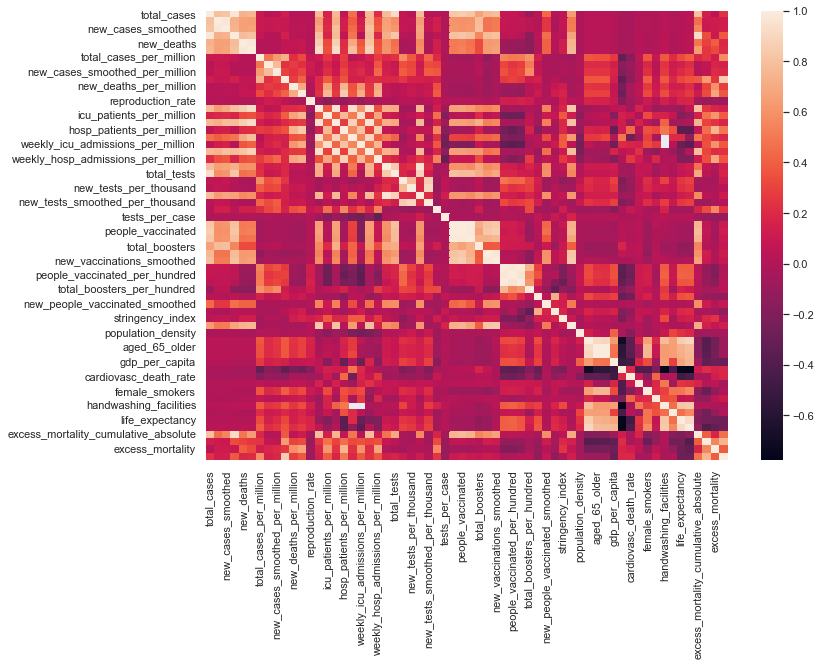

In [144]:
sns.heatmap(covid_data.corr())

visualize distributions

In [ ]:
pd.plotting.scatter_matrix(covid_data[:, 4:10])